# Project 1 - Diabetes Prediction
## Gautham Sritharan, Simone Tarenzi

## Importing the data

In [285]:
import pandas as pd
import matplotlib.pyplot as plt

diabetes = pd.read_csv('diabetes.csv')
diabetes.columns.values[2] = "Blood Pressure"
diabetes.columns.values[3] = "Skin Thickness"
diabetes.columns.values[6] = "Diabetes Pedigree Function"

In [286]:
diabetes

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


## Data Description
The diabetes dataset is a widely used dataset in machine learning and healthcare research. It contains various attributes such as age, body mass index (BMI), blood pressure, and glucose levels, among others, of patients diagnosed with or at risk of diabetes. The dataset is commonly employed for tasks like predictive modeling to determine the likelihood of an individual developing diabetes based on their characteristics. Researchers and data scientists utilize this dataset to develop and validate algorithms for early detection, risk assessment, and personalized treatment strategies for diabetes management.

* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration at 2 hours after eating in an oral glucose tolerance test (mg/dL)
* Blood Pressure: Diastolic blood pressure (mm Hg)
* Skin Thickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (μU/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* Diabetes Pedigree Function: Calculates diabetes likelihood depending on the subject's age and on diabetic family history
* Age: Age in years
* Outcome: 1 for diabetic, 0 for non-diabetic

## Age

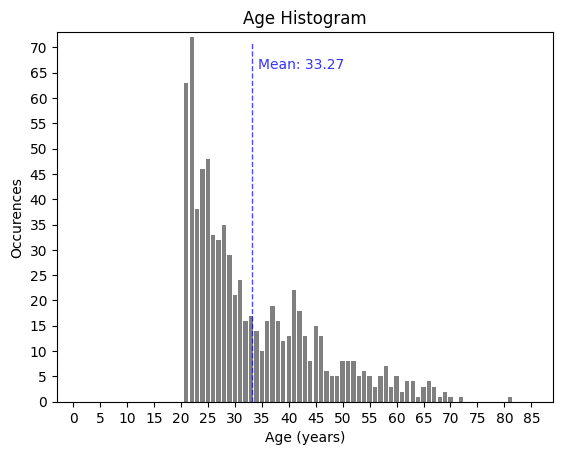

In [287]:
# get minimum and maximum age
min_age = diabetes['Age'].min()
max_age = diabetes['Age'].max()

# calculate average age
average_age = diabetes['Age'].mean()

# show histogram of age
counts, bins, patches = plt.hist(diabetes['Age'], bins=range(0, max_age + 2), align='left', rwidth=0.8, color='gray')
plt.xticks(range(0, max_age + 5, 5))
plt.xlim([0 - 3, max_age + 8])
plt.ylim([0, counts.max() + 1])
plt.locator_params(axis='y', nbins=20)

# show mean on histogram
plt.vlines(average_age, 0, plt.ylim()[1] * 0.97, colors='blue', linestyles='dashed', linewidth=1, alpha=0.7)
plt.text(average_age + 1, plt.ylim()[1] * 0.9, 'Mean: {:.2f}'.format(average_age), color='blue', alpha=0.8)

plt.title('Age Histogram')
plt.xlabel('Age (years)')
plt.ylabel('Occurences')
plt.show()

## Pregnancies

Max pregnancies:  17


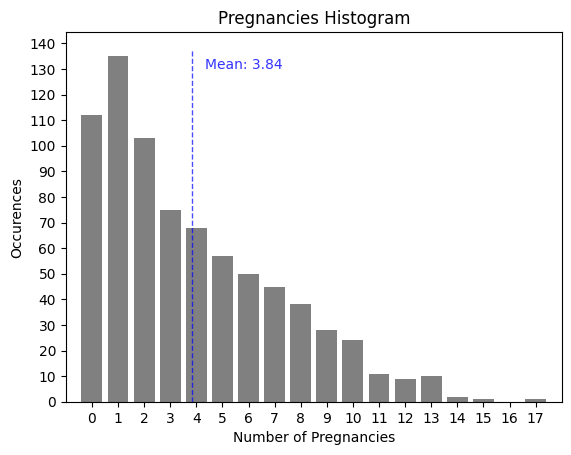

In [288]:
# get maximum number of pregnancies
max_pregnancies = diabetes['Pregnancies'].max()
print("Max pregnancies: ", max_pregnancies)

# calculate average number of pregnancies
average_pregnancies = diabetes['Pregnancies'].mean()

# show histogram of pregnancies
plt.hist(diabetes['Pregnancies'], bins=range(0, max_pregnancies + 2), align='left', rwidth=0.8, color='gray')
plt.xticks(range(0, max_pregnancies + 1))
plt.xlim([-1, max_pregnancies + 1])
plt.locator_params(axis='y', nbins=20)

# show mean on histogram
plt.vlines(average_pregnancies, 0, plt.ylim()[1] * 0.97, colors='blue', linestyles='dashed', linewidth=1, alpha=0.7)
plt.text(average_pregnancies + 0.5, plt.ylim()[1] * 0.9, 'Mean: {:.2f}'.format(average_pregnancies), color='blue', alpha=0.8)

plt.title('Pregnancies Histogram')
plt.xlabel('Number of Pregnancies')
plt.ylabel('Occurences')
plt.show()

## Glucose Level

Glucose level ranges taken from:
* https://www.lark.com/resources/blood-sugar-chart
* https://www.verywellhealth.com/blood-sugar-levels-after-eating-5118330

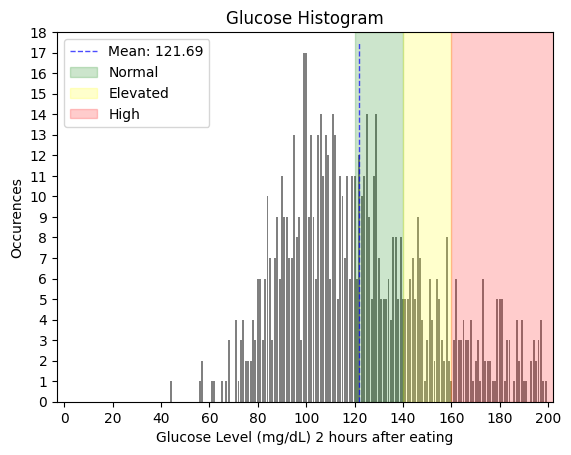

In [289]:
# filter out rows where glucose is 0
diabetes_filtered_glucose = diabetes[diabetes['Glucose'] != 0]

# get minimum and maximum glucose levels
min_glucose = diabetes_filtered_glucose['Glucose'].min()
max_glucose = diabetes_filtered_glucose['Glucose'].max()

# calculate average glucose level
average_glucose = diabetes_filtered_glucose['Glucose'].mean()

# show histogram of glucose levels
counts, bins, patches = plt.hist(diabetes_filtered_glucose['Glucose'], bins=range(0, max_glucose + 2), align='left', rwidth=0.8, color='gray')
plt.xticks(range(0, max_glucose + 2, 20))
plt.xlim([0 - 3, max_glucose + 3])
plt.ylim([0, counts.max() + 1])
plt.locator_params(axis='y', nbins=20)

# show mean on histogram
plt.vlines(average_glucose, 0, plt.ylim()[1] * 0.97, colors='blue', linestyles='dashed', linewidth=1, alpha=0.7)

# define glucose level ranges (2 hours after eating)
normal_lower_bound = 120
normal_upper_bound = 140
elevated_lower_bound = 140
elevated_upper_bound = 160
high_lower_bound = 160
high_upper_bound = 300

# show the ranges on the histogram
plt.fill_betweenx([0, plt.ylim()[1]], normal_lower_bound, normal_upper_bound, color='green', alpha=0.2)
plt.fill_betweenx([0, plt.ylim()[1]], elevated_lower_bound, elevated_upper_bound, color='yellow', alpha=0.2)
plt.fill_betweenx([0, plt.ylim()[1]], high_lower_bound, high_upper_bound, color='red', alpha=0.2)
plt.legend(['Mean: ' + "{:.2f}".format(average_glucose), 'Normal', 'Elevated', 'High'], loc='upper left')


plt.title('Glucose Histogram')
plt.xlabel('Glucose Level (mg/dL) 2 hours after eating')
plt.ylabel('Occurences')
plt.show()

## Blood Pressure

Blood pressure ranges taken from:
* https://www.cdc.gov/bloodpressure/about.htm
* https://www.singlecare.com/blog/blood-pressure-levels/
* https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings
* https://www.webmd.com/hypertension-high-blood-pressure/diastolic-and-systolic-blood-pressure-know-your-numbers

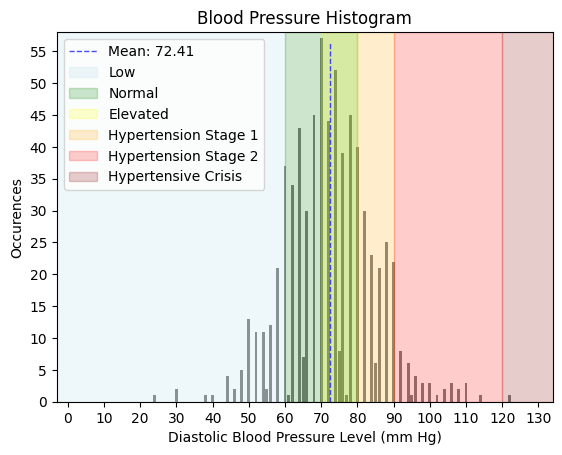

In [290]:
# filter out rows where blood pressure is 0
diabetes_filtered_blood_pressure = diabetes[diabetes['Blood Pressure'] != 0]

# get minimum and maximum blood pressure
min_blood_pressure = diabetes_filtered_blood_pressure['Blood Pressure'].min()
max_blood_pressure = diabetes_filtered_blood_pressure['Blood Pressure'].max()

# calculate average blood pressure
average_blood_pressure = diabetes_filtered_blood_pressure['Blood Pressure'].mean()

# show histogram of blood pressure
counts, bins, patches = plt.hist(diabetes_filtered_blood_pressure['Blood Pressure'], bins=range(0, max_blood_pressure + 2), align='left', rwidth=0.8, color='gray')
plt.xticks(range(0, max_blood_pressure + 10, 10))
plt.xlim([0 - 3, max_blood_pressure + 12])
plt.ylim([0, counts.max() + 1])
plt.locator_params(axis='y', nbins=20)

# show mean on histogram
plt.vlines(average_blood_pressure, 0, plt.ylim()[1] * 0.97, colors='blue', linestyles='dashed', linewidth=1, alpha=0.7)

# define blood pressure ranges
low_lower_bound = -10
low_upper_bound = 60
normal_lower_bound = 60
normal_upper_bound = 80
elevated_lower_bound = 70
elevated_upper_bound = 80
hypertension1_lower_bound = 80
hypertension1_upper_bound = 90
hypertension2_lower_bound = 90
hypertension2_upper_bound = 120
hypertensive_crisis_lower_bound = 120
hypertensive_crisis_upper_bound = 300

# show the ranges on the histogram
plt.fill_betweenx([0, plt.ylim()[1]], low_lower_bound, low_upper_bound, color='lightblue', alpha=0.2)
plt.fill_betweenx([0, plt.ylim()[1]], normal_lower_bound, normal_upper_bound, color='green', alpha=0.2)
plt.fill_betweenx([0, plt.ylim()[1]], elevated_lower_bound, elevated_upper_bound, color='yellow', alpha=0.2)
plt.fill_betweenx([0, plt.ylim()[1]], hypertension1_lower_bound, hypertension1_upper_bound, color='orange', alpha=0.2)
plt.fill_betweenx([0, plt.ylim()[1]], hypertension2_lower_bound, hypertension2_upper_bound, color='red', alpha=0.2)
plt.fill_betweenx([0, plt.ylim()[1]], hypertensive_crisis_lower_bound, hypertensive_crisis_upper_bound, color='darkred', alpha=0.2)
plt.legend(['Mean: ' + "{:.2f}".format(average_blood_pressure), 'Low', 'Normal', 'Elevated', 'Hypertension Stage 1', 'Hypertension Stage 2', 'Hypertensive Crisis'], loc='upper left')

plt.title('Blood Pressure Histogram')
plt.xlabel('Diastolic Blood Pressure Level (mm Hg)')
plt.ylabel('Occurences')
plt.show()

## Skin Thickness

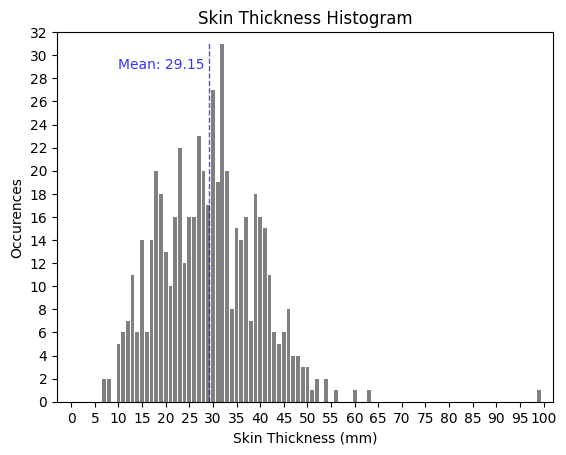

In [291]:
# filter out rows where skin thickness is 0
diabetes_filtered_skin_thickness = diabetes[diabetes['Skin Thickness'] != 0]

# get minimum and maximum skin thickness
min_skin_thickness = diabetes_filtered_skin_thickness['Skin Thickness'].min()
max_skin_thickness = diabetes_filtered_skin_thickness['Skin Thickness'].max()

# calculate average skin thickness
average_skin_thickness = diabetes_filtered_skin_thickness['Skin Thickness'].mean()

# show histogram of skin thickness
counts, bins, patches = plt.hist(diabetes_filtered_skin_thickness['Skin Thickness'], bins=range(0, max_skin_thickness + 2), align='left', rwidth=0.8, color='gray')
plt.xticks(range(0, max_skin_thickness + 2, 5))
plt.xlim([0 - 3, max_skin_thickness + 3])
plt.ylim([0, counts.max() + 1])
plt.locator_params(axis='y', nbins=20)

# show mean on histogram
plt.vlines(average_skin_thickness, 0, plt.ylim()[1] * 0.97, colors='blue', linestyles='dashed', linewidth=1, alpha=0.7)
plt.text(average_skin_thickness - 1, plt.ylim()[1] * 0.9, 'Mean: {:.2f}'.format(average_skin_thickness), color='blue', alpha=0.8, ha='right')

plt.title('Skin Thickness Histogram')
plt.xlabel('Skin Thickness (mm)')
plt.ylabel('Occurences')
plt.show()

## Insulin

Insulin level ranges taken from:
* 

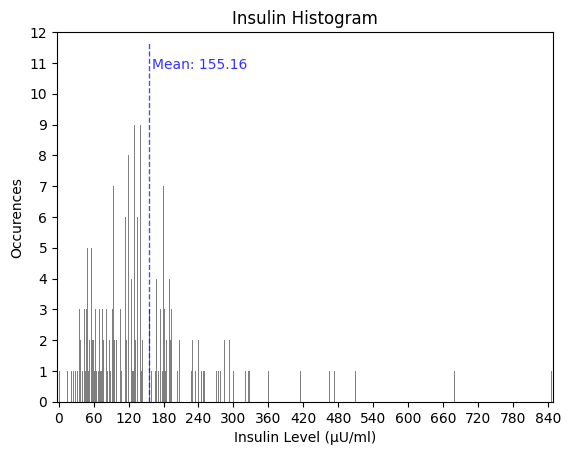

In [292]:
# filter out rows where insulin is 0
diabetes_filtered_insulin = diabetes[diabetes['Insulin'] != 0]

# get minimum and maximum insulin
min_insulin = diabetes_filtered_insulin['Insulin'].min()
max_insulin = diabetes_filtered_insulin['Insulin'].max()

# calculate average insulin
average_insulin = diabetes_filtered_insulin['Insulin'].mean()

# show histogram of insulin
counts, bins, patches = plt.hist(diabetes_filtered_insulin['Insulin'], bins=range(0, max_insulin + 2), align='left', rwidth=0.8, color='gray')
plt.xticks(range(0, max_insulin + 2, 60))
plt.xlim([0 - 3, max_insulin + 3])
plt.ylim([0, counts.max() + 1])
plt.locator_params(axis='y', nbins=20)

# show mean on histogram
plt.vlines(average_insulin, 0, plt.ylim()[1] * 0.97, colors='blue', linestyles='dashed', linewidth=1, alpha=0.7)
plt.text(average_insulin + 5, plt.ylim()[1] * 0.9, 'Mean: {:.2f}'.format(average_insulin), color='blue', alpha=0.8)

plt.title('Insulin Histogram')
plt.xlabel('Insulin Level (μU/ml)')
plt.ylabel('Occurences')
plt.show()

## BMI
BMI levels taken from: https://www.cdc.gov/obesity/basics/adult-defining.html

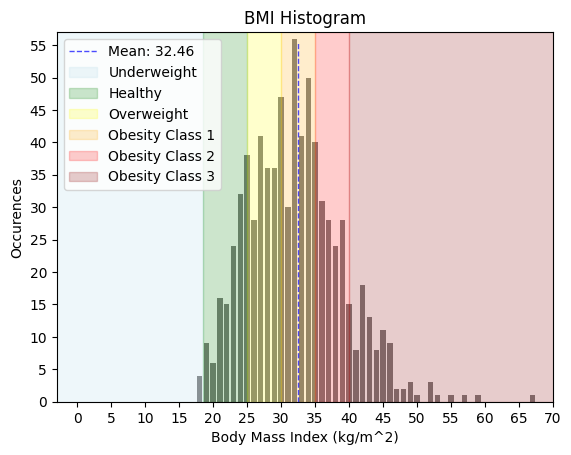

In [293]:
# filter out rows where BMI is 0
diabetes_filtered = diabetes[diabetes['BMI'] != 0]

# get minimum and maximum BMI
min_bmi = diabetes_filtered['BMI'].min()
max_bmi = diabetes_filtered['BMI'].max()

# calculate average BMI
average_bmi = diabetes_filtered['BMI'].mean()

# define BMI levels
underweight_lower_bound = -10
underweight_upper_bound = 18.5
healthy_lower_bound = 18.5
healthy_upper_bound = 25
overweight_lower_bound = 25
overweight_upper_bound = 30
obesity_class1_lower_bound = 30
obesity_class1_upper_bound = 35
obesity_class2_lower_bound = 35
obesity_class2_upper_bound = 40
obesity_class3_lower_bound = 40
obesity_class3_upper_bound = 100

# show histogram of BMI
counts, bins, patches = plt.hist(diabetes_filtered['BMI'], bins=range(0, int(max_bmi) + 2), align='left', rwidth=0.8, color='gray')
plt.xticks(range(0, int(max_bmi) + 5, 5))
plt.xlim([0 - 3, int(max_bmi) + 3])
plt.ylim([0, counts.max() + 1])
plt.locator_params(axis='y', nbins=20)

# show mean on histogram
plt.vlines(average_bmi, 0, plt.ylim()[1] * 0.97, colors='blue', linestyles='dashed', linewidth=1, alpha=0.7)

# show the ranges on the histogram
plt.fill_betweenx([0, plt.ylim()[1]], underweight_lower_bound, underweight_upper_bound, color='lightblue', alpha=0.2)
plt.fill_betweenx([0, plt.ylim()[1]], healthy_lower_bound, healthy_upper_bound, color='green', alpha=0.2)
plt.fill_betweenx([0, plt.ylim()[1]], overweight_lower_bound, overweight_upper_bound, color='yellow', alpha=0.2)
plt.fill_betweenx([0, plt.ylim()[1]], obesity_class1_lower_bound, obesity_class1_upper_bound, color='orange', alpha=0.2)
plt.fill_betweenx([0, plt.ylim()[1]], obesity_class2_lower_bound, obesity_class2_upper_bound, color='red', alpha=0.2)
plt.fill_betweenx([0, plt.ylim()[1]], obesity_class3_lower_bound, obesity_class3_upper_bound, color='darkred', alpha=0.2)
plt.legend(['Mean: ' + "{:.2f}".format(average_bmi), 'Underweight', 'Healthy', 'Overweight', 'Obesity Class 1', 'Obesity Class 2', 'Obesity Class 3'], loc='upper left')

plt.title('BMI Histogram')
plt.xlabel('Body Mass Index (kg/m^2)')
plt.ylabel('Occurences')
plt.show()